In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


import json
from datetime import datetime, timezone

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib
import sklearn

In [3]:
file_name = 'data/df_featured_ideal.csv'
df = pd.read_csv(file_name)

In [4]:
df

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,...,Nz,curvature,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,PCV
0,2,0,0.330174,0.871877,0.393169,3.962087,10.462519,4.718032,3.9375,10.4375,...,0.415043,0.084266,0.868157,1.103043,0.680447,65.477987,359.949687,65.477987,359.949687,0.679688
1,2,0,0.111604,0.746168,0.350633,1.339252,8.954014,4.207599,1.3125,8.9375,...,0.153571,0.077296,0.958450,1.127828,0.594449,81.166086,0.182357,81.166086,0.182357,0.398438
2,2,0,0.317910,1.246824,0.386342,3.814921,14.961891,4.636103,3.8125,14.9375,...,0.349030,0.109690,0.888356,1.113748,0.671757,69.572013,0.019939,69.572013,0.019939,0.460938
3,2,0,0.114570,2.703832,0.327411,1.374843,32.445984,3.928936,1.3750,32.4375,...,0.469950,0.044343,0.978474,1.296502,0.850591,61.968969,359.973042,61.968969,359.973042,0.328125
4,2,0,0.115709,1.795413,0.386273,1.388504,21.544961,4.635275,1.3750,21.5625,...,0.342892,0.097707,0.877725,1.099093,0.661517,69.946814,179.612278,69.946814,179.612278,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199982,4,3,0.416138,0.036854,0.029596,4.993662,0.442243,0.355158,5.0000,0.4375,...,0.929420,0.030801,1.343398,1.565836,0.804441,21.655378,358.308865,21.655378,358.308865,0.531250
199983,4,3,0.420961,0.415016,0.012598,5.051536,4.980196,0.151181,5.0625,5.0000,...,0.924296,0.025846,1.306586,1.538944,0.813130,22.437559,359.809935,22.437559,359.809935,0.429688
199984,4,3,0.023346,2.614797,0.026030,0.280157,31.377559,0.312362,0.2500,31.3750,...,0.933247,0.021967,1.339528,1.564366,0.808026,21.053205,180.079187,21.053205,180.079187,0.460938
199985,4,3,0.001424,2.521588,0.005614,0.017087,30.259055,0.067363,0.0000,30.2500,...,0.898805,0.030213,1.225253,1.487467,0.843393,25.998549,179.561775,25.998549,179.561775,0.515625


In [52]:
# GOAL
'''
is_rail_a
is_rail_b
is_web
is_head_top
is_head_side
is_noise

'''

'\nis_rail_a\nis_rail_b\nis_web\nis_head_top\nis_head_side\nis_noise\n\n'

In [5]:
# Calculate the mean of the 'lateral' column
lateral_mean = df['lateral'].mean()

# Create binary flags
df['is_rail_a'] = (df['lateral'] < lateral_mean).astype(int)  # 1 if less than mean, else 0
df['is_rail_b'] = (df['lateral'] >= lateral_mean).astype(int) # 1 if greater than or equal to mean, else 0


In [6]:
df.describe()

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,...,roughness_mean_abs,roughness_rms,roughness_std,DIP,DIPDIR,NORMDIP,NORMDIPDIR,PCV,is_rail_a,is_rail_b
count,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,...,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,2.989094,2.010786,0.218682,1.500566,0.215935,2.624186,18.006792,2.591223,2.624172,18.006812,...,1.125029,1.361971,0.759605,50.349715,180.661599,50.349715,180.661599,0.396929,0.501123,0.498877
std,1.044429,1.012798,0.099058,0.866887,0.142359,1.188693,10.402641,1.708307,1.188912,10.402710,...,0.185275,0.179050,0.100025,26.956597,125.799406,26.956597,125.799406,0.198990,0.500000,0.500000
min,1.000000,0.000000,0.000003,0.000000,0.000000,0.000039,0.000000,0.000000,0.000000,0.000000,...,0.854085,1.056275,0.532118,0.004832,0.000012,0.004832,0.000012,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.148005,0.748376,0.063317,1.776063,8.980512,0.759803,1.750000,9.000000,...,0.985897,1.198593,0.681230,22.195716,155.889968,22.195716,155.889968,0.265625,0.000000,0.000000
50%,3.000000,2.000000,0.217175,1.502129,0.216549,2.606102,18.025552,2.598583,2.625000,18.000000,...,1.003025,1.319714,0.779630,58.025662,179.990362,58.025662,179.990362,0.367188,1.000000,0.000000
75%,4.000000,3.000000,0.289600,2.253156,0.346422,3.475197,27.037874,4.157067,3.500000,27.062500,...,1.329381,1.555305,0.824278,74.490510,287.288033,74.490510,287.288033,0.500000,1.000000,1.000000
max,4.000000,3.000000,0.437500,2.999951,0.426949,5.250000,35.999409,5.123385,5.250000,36.000000,...,1.505020,1.682988,0.956009,89.999828,359.999989,89.999828,359.999989,0.976562,1.000000,1.000000


In [7]:
dfa = df[df['is_rail_a'] == 1].copy()
dfb = df[df['is_rail_b'] == 1].copy()

In [8]:
df.columns


Index(['Classification', 'Original_cloud_index', 'lateral', 'axial',
       'vertical', 'lateral_inch', 'axial_inch', 'vertical_inch',
       'lateral_inch_round', 'axial_inch_round', 'vertical_inch_round',
       'min_in_window', 'relative_vertical_inch', 'lam1', 'lam2', 'lam3',
       'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z',
       'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy', 'planarity',
       'linearity', 'surface_variation', 'sphericity', 'pca1', 'pca2',
       'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'curvature',
       'roughness_mean_abs', 'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR',
       'NORMDIP', 'NORMDIPDIR', 'PCV', 'is_rail_a', 'is_rail_b'],
      dtype='object')

In [17]:
# --- 1) Define features/target ---
# Use your feature list, but remove duplicates and DO NOT include the target.
features = [
    'lateral_inch', 'axial_inch', 'vertical_inch',
    'relative_vertical_inch', 'lam1', 'lam2', 'lam3',
    'e1x', 'e1y', 'e1z', 'e2x', 'e2y', 'e2z', 'e3x', 'e3y', 'e3z',
    'eigen_sum', 'omnivariance', 'eigenentropy', 'anisotropy', 'planarity',
    'linearity', 'surface_variation', 'sphericity', 'pca1', 'pca2',
    'verticality', 'O', 'neighbors', 'Nx', 'Ny', 'Nz', 'PCV', 'curvature',
    'roughness_mean_abs', 'roughness_rms', 'roughness_std', 'DIP', 'DIPDIR',
    'NORMDIP', 'NORMDIPDIR'
]
features = list(dict.fromkeys(features))  # dedupe

target = 'Classification'

# --- 2) Prepare training data ---
# Assumes df already exists in memory (load it if needed)
# df = pd.read_parquet("your_training_data.parquet")  # example
X = df[features].copy().apply(pd.to_numeric, errors='coerce')
y = df[target].copy()

# --- 3) Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y if y.nunique() > 1 else None
)

# --- 4) Build pipeline: impute -> RandomForest ---
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=1,
        class_weight='balanced',   # helpful if target is imbalanced
        n_jobs=-1,
        random_state=42
    ))
])

# --- 5) Train ---
pipeline.fit(X_train, y_train)

# --- 6) Evaluate (optional but recommended) ---
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9986

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5726
           2       1.00      1.00      1.00      4858
           3       1.00      1.00      1.00     13540
           4       1.00      1.00      1.00     15874

    accuracy                           1.00     39998
   macro avg       1.00      1.00      1.00     39998
weighted avg       1.00      1.00      1.00     39998


Confusion matrix:
 [[ 5719     1     0     6]
 [    1  4838     0    19]
 [    0     0 13539     1]
 [    1    23     2 15848]]


In [23]:

# --- 7) Save model + metadata ---
model_path = "rf_classification_ideal_rail.joblib"
meta_path = "rf_classification_ideal_rail_metadata.json"

joblib.dump(pipeline, model_path)

metadata = {
    "saved_at": datetime.now(timezone.utc).isoformat(),
    "model_path": model_path,
    "features": features,
    "target": target,
    "sklearn_version": sklearn.__version__,
    "pandas_version": pd.__version__,
    "numpy_version": np.__version__,
    "train_shape": [int(X_train.shape[0]), int(X_train.shape[1])],
    "test_shape": [int(X_test.shape[0]), int(X_test.shape[1])],
}
with open(meta_path, "w") as f:
    json.dump(metadata, f, indent=2)

print(f"\nSaved model to: {model_path}")
print(f"Saved metadata to: {meta_path}")



Saved model to: rf_classification_ideal_rail.joblib
Saved metadata to: rf_classification_ideal_rail_metadata.json


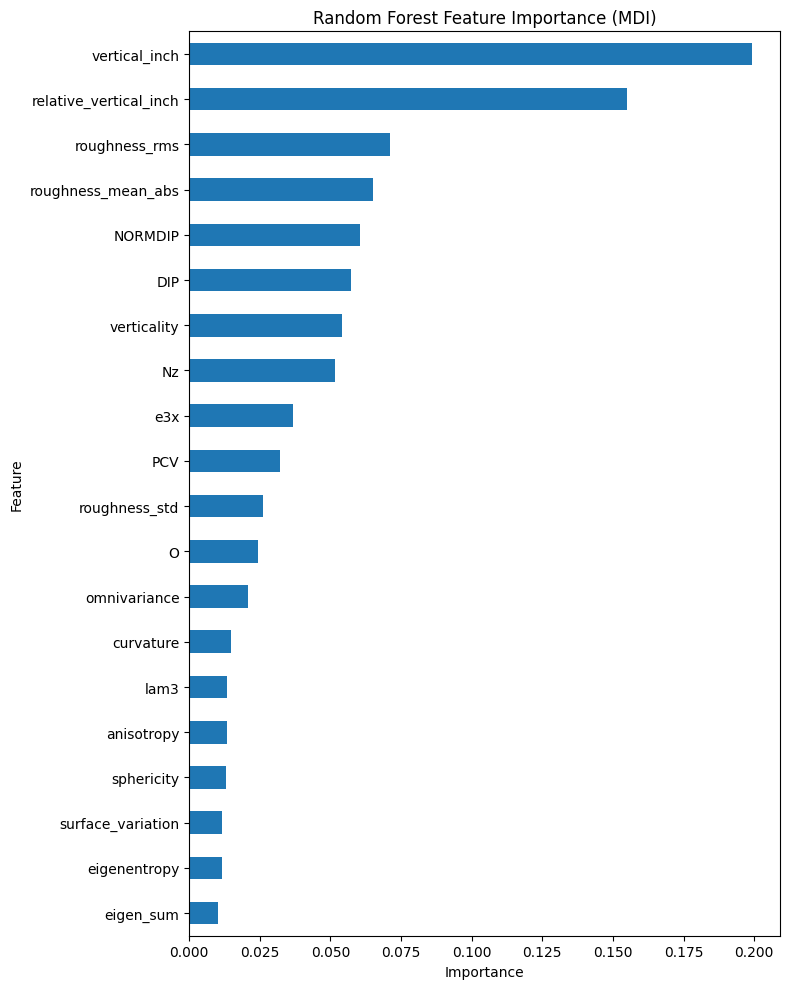


Top MDI features:
vertical_inch             0.199147
relative_vertical_inch    0.154935
roughness_rms             0.071147
roughness_mean_abs        0.065101
NORMDIP                   0.060346
DIP                       0.057421
verticality               0.053944
Nz                        0.051645
e3x                       0.036711
PCV                       0.032249
roughness_std             0.026024
O                         0.024295
omnivariance              0.020802
curvature                 0.014666
lam3                      0.013561
anisotropy                0.013415
sphericity                0.013026
surface_variation         0.011647
eigenentropy              0.011502
eigen_sum                 0.010355
dtype: float64


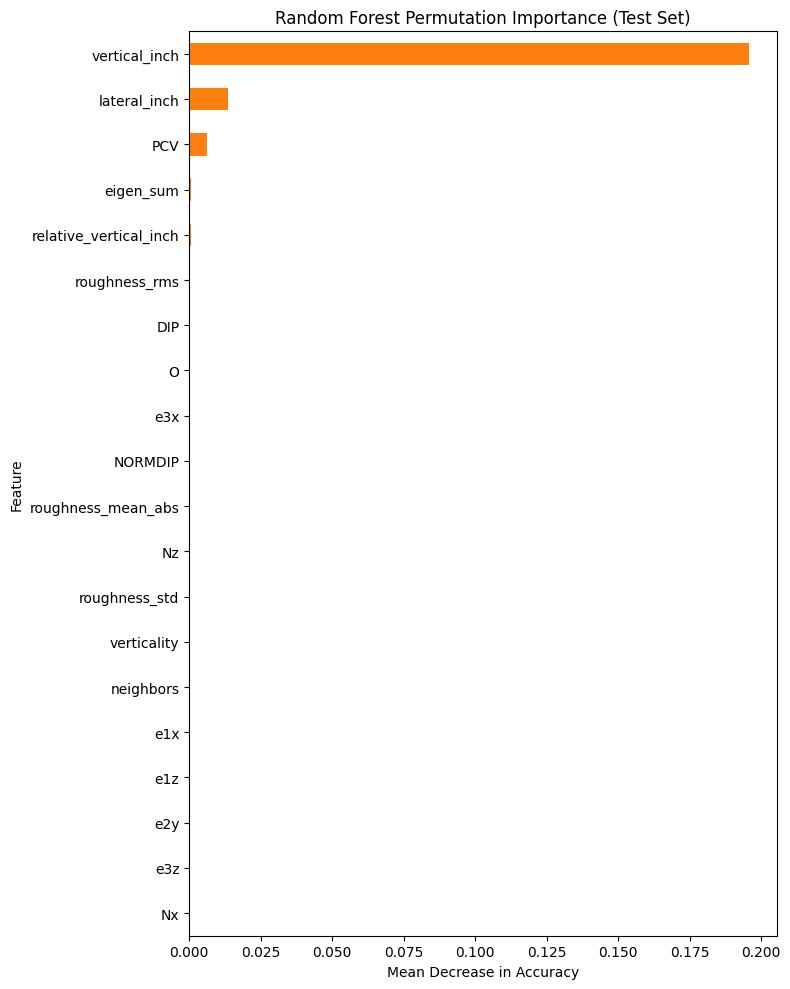


Top permutation-importance features:
vertical_inch             0.195630
lateral_inch              0.013408
PCV                       0.006195
eigen_sum                 0.000730
relative_vertical_inch    0.000593
roughness_rms             0.000468
DIP                       0.000265
O                         0.000248
e3x                       0.000228
NORMDIP                   0.000225
roughness_mean_abs        0.000213
Nz                        0.000200
roughness_std             0.000148
verticality               0.000098
neighbors                 0.000080
e1x                       0.000043
e1z                       0.000035
e2y                       0.000013
e3z                       0.000010
Nx                        0.000005
dtype: float64


In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

# 1) Get the exact training feature order (robust to Pipeline or plain estimator)
features_in = list(getattr(pipeline, "feature_names_in_", features))

# 2) Align X_test to the training feature order to avoid the "feature names" error
X_test_aligned = X_test.reindex(columns=features_in).apply(pd.to_numeric, errors='coerce')

# 3) MDI (Mean Decrease in Impurity) from the trained RandomForest
rf = pipeline.named_steps['rf']  # access the RF inside the pipeline
importances_mdi = pd.Series(rf.feature_importances_, index=features_in).sort_values(ascending=False)

top_k = 20  # change as needed
plt.figure(figsize=(8, 10))
importances_mdi.head(top_k).sort_values().plot(kind='barh', color='#1f77b4')
plt.title('Random Forest Feature Importance (MDI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop MDI features:")
print(importances_mdi.head(top_k))

# 4) Permutation Importance on the test set (uses the full pipeline safely)
perm_result = permutation_importance(
    pipeline,
    X_test_aligned,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances_perm = pd.Series(perm_result.importances_mean, index=features_in).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
importances_perm.head(top_k).sort_values().plot(kind='barh', color='#ff7f0e')
plt.title('Random Forest Permutation Importance (Test Set)')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop permutation-importance features:")
print(importances_perm.head(top_k))
